In [16]:
import numpy as np
import sys
sys.path.append('../src/src_python/')
from dynamics import dynamics

import matplotlib.pyplot as plt

We plot the condition

$$ \epsilon < \max\left\{ \frac{\left \|L_\mathbf{g}h(\mathbf{x}) \right\|}{2\mathfrak{L}_{L_\mathbf{g}h}}, \frac{L_\mathbf{f}h(\mathbf{x}) +  \alpha(h(\mathbf{x}))}{(\mathfrak{L}_{L_\mathbf{f}h} + \mathfrak{L}_{\alpha \circ h})} \right\} $$

x dot, theta, and theta dot


In [57]:
# code from ECOS filter and ecos.launch

L_Lgh = 1# 0.5
L_Lfh = 1 #0.1
L_ah = 5
alpha = 10
C = 1 # TODO: not sure which param this should be

def get_fns(x):
    
    f,g = dynamics(x)
    x5_eq = 0.138
    # todo: should only certain components count?
    Lfh = -x[6]*(x[5] - x5_eq + f[6])
    Lgh = -x[6]*g[6,[0,1]]  
    ah = alpha * (-1/2*((x[5]-x5_eq)**2 + x[6]**2) + C)
    
    return Lgh, Lfh, ah

def get_bd(x):
    Lgh, Lfh, ah = get_fns(x)
    return max(np.linalg.norm(Lgh) / (2*L_Lgh), (Lfh + ah)/(2*(L_Lfh+L_ah)))

In [58]:
train_data_fn = 'gridded_data.csv'
data = np.load('../data/' + train_data_fn.split('.')[0] + '_processed.npz')
states = data['states']


In [59]:
# constructing a grid of the states

# specifying upper_bd, lower_bd, num_grid
grid_limits = np.array([[-1, 1, 20], # x
                        [-6, 6, 20], # xd
                        [0, 0, 1],
                        [0, 0, 1],
                        [0, 0, 1],
                        [-1, 1, 20], # theta
                        [-6,6, 20]]) # thetad

# computing bound on eps for all of these values
eps_of_x = -np.inf * np.ones(grid_limits[:,2])
for i0, x0 in enumerate(np.linspace(*grid_limits[0])):
    for i1, x1 in enumerate(np.linspace(*grid_limits[1])):
        for i2, x2 in enumerate(np.linspace(*grid_limits[2])):
            for i3, x3 in enumerate(np.linspace(*grid_limits[3])):
                for i4, x4 in enumerate(np.linspace(*grid_limits[4])):
                    for i5, x5 in enumerate(np.linspace(*grid_limits[5])):
                        for i6, x6 in enumerate(np.linspace(*grid_limits[6])):
                            eps_of_x[i0, i1, i2, i3, i4, i5, i6] = get_bd(np.array([x0, x1, x2, x3, x4, x5, x6]))

In [60]:
eps_of_x.shape

(20, 20, 1, 1, 1, 20, 20)

In [61]:
np.min(eps_of_x, axis=(1,2,3,4,6)).shape

(20, 20)

In [62]:
eps_bounds = []
for state in states:
    # TODO need to max over all other state dimensions
    eps_bounds.append(get_bd(state))

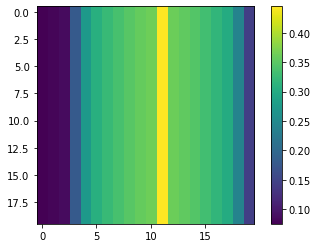

In [63]:
xpos = np.linspace(*grid_limits[0])
ypos = np.linspace(*grid_limits[5])
colors = np.min(eps_of_x, axis=(1,2,3,4,6))

plt.figure()
plt.imshow(colors)
plt.colorbar()

In [30]:
states.shape

(751, 7)